## Read the Biomet Database

This Notebook can be used to run the MakeCSV script.  It can also be called from command line (see README).

In [105]:
import importlib
import ReadDatabase
importlib.reload(ReadDatabase)

Make = ReadDatabase.MakeCSV(['BB'],[y for y in range(2022,2023)])

Creating .csv files for BB: Biomet
Creating .csv files for BB: Kljun_FFP_Inputs
Trace does not exist C:/Database/2022/BB/Clean/SecondStage/canopy_height , proceeding without


In [104]:
Make.Data

,L,USTAR,wind_speed,wind_dir,V_SIGMA,canopy_height,hpbl_interp_spline,TIMESTAMP
2022-01-01 00:30:00,14.685512,0.170123,0.185530,113.946976,0.649896,NaN,NaN,2022-01-01 0030
2022-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01 0100
2022-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01 0130
2022-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01 0200
2022-01-01 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01 0230
...,...,...,...,...,...,...,...,...
2022-12-31 22:00:00,-4.678627,0.029885,0.399888,200.578781,0.192431,NaN,NaN,2022-12-31 2200
2022-12-31 22:30:00,1.566709,0.027501,0.544117,244.104004,0.291256,NaN,NaN,2022-12-31 2230
2022-12-31 23:00:00,51.526978,0.188291,0.409705,253.762543,0.388403,NaN,NaN,2022-12-31 2300
2022-12-31 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-31 2330


In [15]:
import WriteDatabase
import importlib
importlib.reload(WriteDatabase)

WD = WriteDatabase.MakeTraces()

# WG = WriteDatabase.GSheetDump()#ini='../Extract_NARR_Data/WriteTraces_NARR.ini')

for key in WD.ini.keys():
    print(key)




DEFAULT
Paths
Database
Input
BBS_Flux_Station
BBS_PSW_S
BBS_PSW_R
BBS_PSTS
BBS_PSLS
BBS_PSLS_S


In [97]:
importlib.reload(WriteDatabase)
WG = WriteDatabase.GSheetDump()

No Metadata?
No Metadata?


In [87]:
# WG.dateIndex()
pd.to_datetime(['202303281419'],format='%Y%m%d%H%M')

DatetimeIndex(['2023-03-28 14:19:00'], dtype='datetime64[ns]', freq=None)

In [76]:
for col in WG.ini[WG.Site_File]['Date_Cols'].split(','):
    print(WG.Site_File)
    print(col)
    print(WG.ini[WG.Site_File]['header_list'])
    ix = WG.ini[WG.Site_File]['header_list'].split(',').index(col)
# WG.Data

BB2
Year
_,Year,Month,Day,WTH cm,Pipe_Height cm
BB2
Month
_,Year,Month,Day,WTH cm,Pipe_Height cm
BB2
Day
_,Year,Month,Day,WTH cm,Pipe_Height cm
BB2
Hour
_,Year,Month,Day,WTH cm,Pipe_Height cm


ValueError: 'Hour' is not in list

In [34]:
sheet = 'https://docs.google.com/spreadsheets/d/1sUKRRCaDm0Am-VQjUrMvAuK8YG2Ad9hi3tMHcQDrnKM/edit?usp=sharing'

sheet = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPareyDN7uQ6Jxq5aOJG0lGvVnIZHrkrzX10JBuCEX_6Xe1Y-yIuHBa_hSfaMSGs4kJed0fB5MWKb9/pubhtml'

import pandas as pd

df = pd.read_html(sheet,skiprows=1)

# len(df[1])
df[0]

,1,Year,Month,Day,Time,WTH cm,Pipe_Height cm
0,2,2023,3,28,14:19,114.0,109.50
1,3,2023,6,7,13:40,120.0,118.00
2,4,2023,6,26,10:41,123.5,120.25
3,5,2023,7,15,11:16,133.0,125.75
4,6,2023,7,19,13:53,133.5,125.00
5,7,2023,7,21,10:31,133.6,126.25
6,8,2023,8,22,11:18,141.5,132.50
7,9,2023,9,16,11:55,147.0,138.25


In [89]:
import pandas as pd
# BB1
df = pd.read_html('https://docs.google.com/spreadsheets/d/1RhvyM41GKP_6CTKsQPLCu5TCIeQ4HDtnW9MHw8Iof70/edit?usp=sharing',
            #  flavor='bs4',
            skiprows=1,
             encoding='utf8')[0]

drop = ['1']
for c in df.columns:
    if 'Unnamed:' in c:
        drop.append(c)

newDF=df.drop(columns=drop)
newDF = newDF.loc[newDF[['DATE','WT_man','Pipe Height_mean']].isna().sum(axis=1)<=1]

newDF['TIMESTAMP']=pd.DatetimeIndex(newDF['DATE'])
newDF = newDF.set_index('TIMESTAMP')

# newDF['Pipe Height_mean'] = newDF['Pipe Height_mean'].fillna(newDF['WT_PT']-newDF['WT_man'])
newDF

# # BB2
# df = pd.read_html('https://docs.google.com/spreadsheets/d/1VG6HpWcjh1SNtswwtXXZmtyn1mAR0zM0URKVTRZ8p-k/edit?usp=sharing',
#             #  flavor='bs4',
#             skiprows=1,
#              encoding='utf8')[0]


# drop = ['1']
# for c in df.columns:
#     if 'Unnamed:' in c:
#         drop.append(c)

# newDF=df.drop(columns=drop)
# newDF = newDF.loc[newDF[['DATE','WT_man','Pipe Height']].isna().sum(axis=1)<=1]

# newDF['TIMESTAMP']=pd.DatetimeIndex(newDF['DATE'])
# newDF = newDF.set_index('TIMESTAMP')
# newDF['Pipe Height'] = newDF['Pipe Height'].fillna(newDF['WT_man']+newDF['WT_PT'])

# newDF

,DATE,WT_man,WT_PT,Pipe Height_mean
TIMESTAMP,,,,
2018-11-06 09:23:00,11/6/2018 09:23,116.7,-37.807297,-154.507297
2018-11-16 11:24:00,11/16/2018 11:24,114.1,-34.747902,-148.847902
2018-12-06 11:33:00,12/6/2018 11:33,111.9,-31.849739,-143.749739
2018-12-14 09:30:00,12/14/2018 9:30,107.6,-27.609772,-135.209772
2019-01-08 09:57:00,1/8/2019 09:57,107.6,-27.593239,-135.193239
2019-01-30 10:17:00,1/30/2019 10:17,110.1,-30.417015,-140.517015
2019-02-13 09:52:00,2/13/2019 9:52,110.5,-29.649002,-140.149002
2019-02-27 14:15:00,2/27/2019 14:15,109.5,-29.773125,-139.273125
2019-03-06 11:36:00,3/6/2019 11:36,110.8,-31.402771,-142.202771


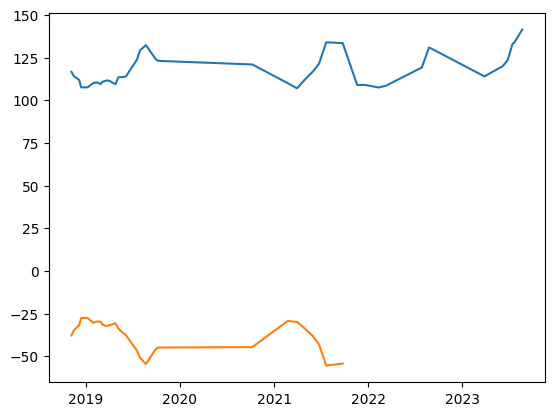

In [91]:
import matplotlib.pyplot as plt

plt.plot(newDF['WT_man'])
plt.plot(newDF['WT_PT'])

## Write to the Biomet Database

* Can only be done from vinimet

In [27]:
import importlib
import WriteDatabase
importlib.reload(WriteDatabase)

Make = WriteDatabase.MakeTraces()#'../Extract_NARR_Data/WriteTraces_NARR.ini')


# ['BBS.M']


                TIMESTAMP  RECORD AirTC_Avg    RH_Avg Current_Avg BattV_Min  \
0                     NaN     NaN       Avg       Avg         Avg       Min   
1     2023-06-15 22:30:00    62.0  12.90875  80.59637  -0.7510659  12.99363   
2     2023-06-15 23:00:00    63.0  12.98501  75.74628  -0.7531511   12.9713   
3     2023-06-15 23:30:00    64.0  13.05327  75.90021  -0.7544729  12.95926   
4     2023-06-16 00:00:00    65.0  13.10587  78.78446  -0.7527661  12.94238   
...                   ...     ...       ...       ...         ...       ...   
1525  2023-08-22 11:00:00  1525.0  20.46151  69.98457    2.078365  14.39087   
1526  2023-08-22 11:30:00  1526.0  20.57463  68.14083    1.616288  14.34115   
1527  2023-08-22 12:00:00  1527.0  20.83718  67.60914     1.61553  14.28039   
1528  2023-08-22 12:30:00  1528.0  20.95954  64.97784     1.63752  14.24724   
1529  2023-08-22 13:00:00  1529.0  20.97111  62.46556    1.682531  14.23619   

     Voltage_Min NR_Wm2_Avg  SlrW_Avg  
0          

In [23]:
Make.Year

,BB,clean_tv
Timestamp,,
2023-01-01 00:30:00,254.3,738887.020833
2023-01-01 01:00:00,181.4,738887.041667
2023-01-01 01:30:00,167.7,738887.062500
2023-01-01 02:00:00,153.9,738887.083333
2023-01-01 02:30:00,140.2,738887.104167
...,...,...
2023-12-31 22:00:00,NaN,739251.916667
2023-12-31 22:30:00,NaN,739251.937500
2023-12-31 23:00:00,NaN,739251.958333


In [86]:
import pandas as pd# Make.Met
Test = {'Year':['2000','2023'],
        'month':['11','02'],
        'day':['11','13'],
        'HHMM':['0000','2330']}

Data = pd.DataFrame(data=Test)

Data['date'] = ''
# pd
for c,s in zip(['Year','month','day','HHMM'],['','','','']):
    Data['date'] = Data['date'].str.cat(Data[c],sep=s)
pd.to_datetime(Data['date'],format='%Y%m%d%H%M')

0   2000-11-11 00:00:00
1   2023-02-13 23:30:00
Name: date, dtype: datetime64[ns]